In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

In [13]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
print(df.isnull().sum())
df = df.dropna()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [15]:
df.columns = df.columns.str.strip()

In [16]:
df.rename(columns={

    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate',
    'Area': 'Area'
}, inplace=True)


print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Area'],
      dtype='object')


In [17]:
df['Unemployment_MA'] = df['Unemployment Rate'].rolling(window=12).mean()

C:\Users\User\AppData\Local\Temp\ipykernel_13816\2278533045.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

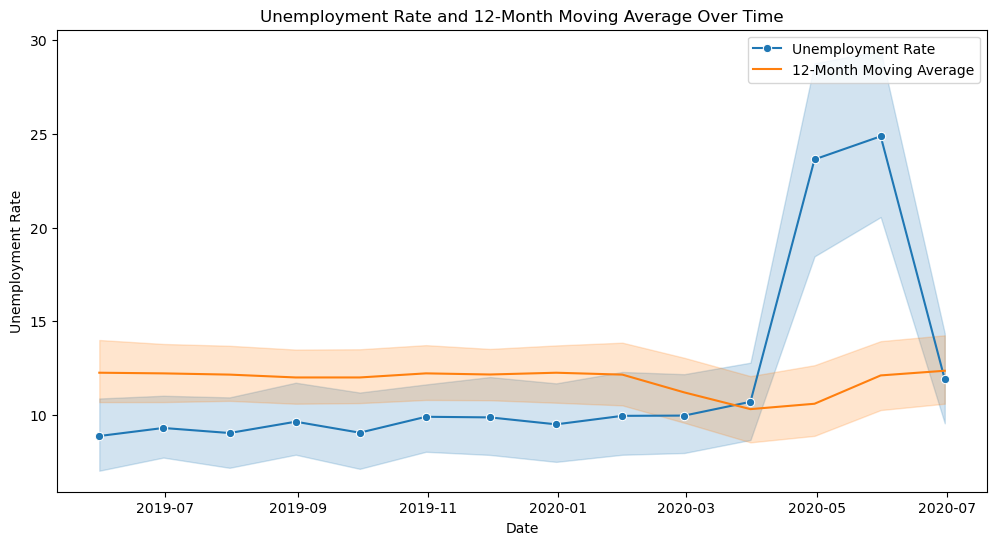

In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment Rate', marker='o', label='Unemployment Rate')
sns.lineplot(data=df, x='Date', y='Unemployment_MA', label='12-Month Moving Average')
plt.title("Unemployment Rate and 12-Month Moving Average Over Time")
plt.legend()
plt.show()

In [19]:
scaler = MinMaxScaler()
df['Unemployment Rate'] = scaler.fit_transform(df[['Unemployment Rate']])

In [20]:
df_prophet = df[['Date', 'Unemployment Rate']].rename(columns={'Date': 'ds', 'Unemployment Rate': 'y'})
model = Prophet()
model.fit(df_prophet)
forecast = model.predict(df_prophet)

00:48:05 - cmdstanpy - INFO - Chain [1] start processing
00:48:05 - cmdstanpy - INFO - Chain [1] done processing


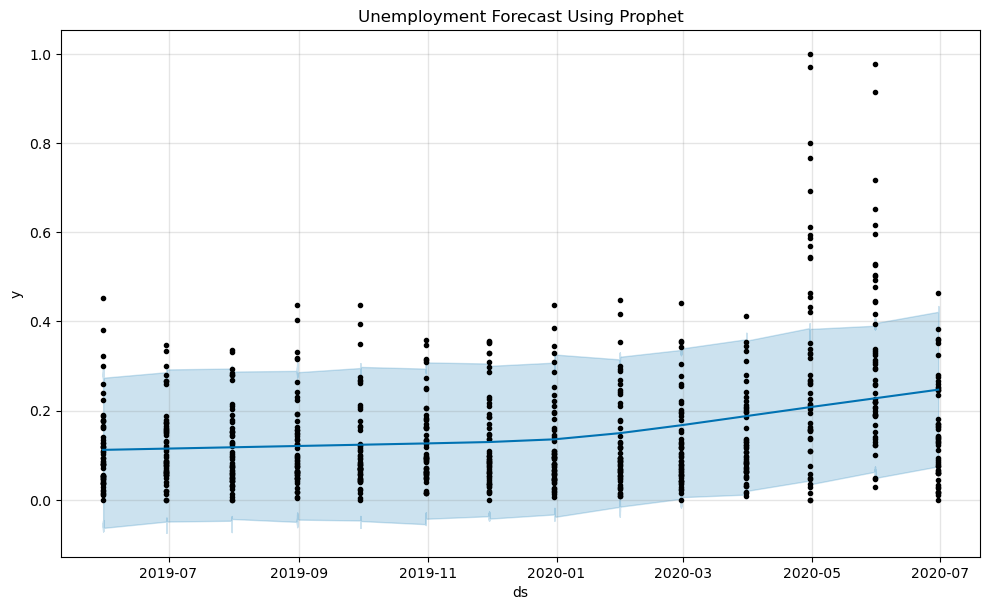

In [21]:
model.plot(forecast)
plt.title("Unemployment Forecast Using Prophet")
plt.show()

In [22]:
model_arima = ARIMA(df['Unemployment Rate'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=5)
print("ARIMA Forecast:", forecast_arima)

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast: 740    0.126161
741    0.139275
742    0.141275
743    0.147857
744    0.149917
Name: predicted_mean, dtype: float64


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
